# Hyper-parameter exploration

For the first half of Part B, this section will show basic fitnesses in relation to hyperparameters being adjusted. The genetic algorithm will be ran and data will be saved to a .csv file and plotted.

In [1]:
# import visualization helper libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import copy

# store string path as variable
path = './csv_files/'

In [67]:
import population
import simulation 
import genome 
import creature 

# modified version of the original test_ga.py from the wk4_end files
def runGA(generations=5,
          pop_size=10,
          gene_count=3,
          mut_prate=0.1,
          mut_srate=0.25,
          mut_grate=0.1,
          dist=1,
          rpy=1):
    pop = population.Population(pop_size, gene_count)
    sim = simulation.Simulation()
    results = []
    
    # start algorithm, iterate through generations and creatures
    for gen in range(generations):
        for cr in pop.creatures:
            try:
                sim.run_creature(cr, 2400)
            except:
                continue            

        # get variables of creatures
        fits = [cr.get_distance_travelled() 
                for cr in pop.creatures]
        links = [len(cr.get_expanded_links()) # pass multiplier here
                for cr in pop.creatures]
        fit_map = population.Population.get_fitness_map(fits)
        new_creatures = []
        
        # randomly select parent and children in population to mutate
        for _ in range(len(pop.creatures)):
            p1_ind = population.Population.select_parent(fit_map)
            p2_ind = population.Population.select_parent(fit_map)
            p1 = pop.creatures[p1_ind]
            p2 = pop.creatures[p2_ind]
            
            # apply mutations to creature
            dna = genome.Genome.crossover(p1.dna, p2.dna)
            dna = genome.Genome.point_mutate(dna, rate=mut_prate)
            dna = genome.Genome.shrink_mutate(dna, rate=mut_srate)
            dna = genome.Genome.grow_mutate(dna, rate=mut_grate)
            cr = creature.Creature(1)
            cr.update_dna(dna)
            new_creatures.append(cr)

        # elitism, generate .csv file/data of fittest function
        max_fit = np.max(fits)
        for cr in pop.creatures:
            if cr.get_distance_travelled() == max_fit:
                new_cr = creature.Creature(1)
                new_cr.update_dna(cr.dna)
                new_creatures[0] = new_cr
                if gen == generations-1:
                        filename = "elite_"+str(gen)+".csv"
                        print(f"Saved to {filename}")
                        genome.Genome.to_csv(cr.dna, filename)
                break

        
        # cycle new population
        pop.creatures = new_creatures


        # append data to results
        mean = np.round(np.mean(fits), 3)
        fittest = np.round(np.max(fits), 3)
        mean_links = np.round(np.mean(links))
        max_links = np.round(np.max(links))
        results.append([gen+1, mean, fittest, mean_links, max_links])

    return results
                        


## Fit and Hyperparameters
Fit is the distance travelled by the biomorph, so we'll use this as our target measurement. 

We'll first run a basic test with 100 iterations to have a foundation to compare future results to. This will determine if mean/max fit has any substantial growth in relation to hyperparameters such as generation, population, genes, etc.

Note: 100 iterations takes roughly ~15min for my computer to run, high test parameters are lowered to reduce computational time.

In [48]:
# get data of fits over generations
basic = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3,dist=1.2))
basic.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
basic.to_csv(f'{path}default_settings3.csv', index=False)
basic

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,0.924,2.255,6.0,13
1,2,1.060,2.591,4.0,6
2,3,0.795,2.591,3.0,4
3,4,1.097,2.624,4.0,7
4,5,0.811,2.624,3.0,6
...,...,...,...,...,...
95,96,1.940,7.833,9.0,15
96,97,2.696,7.833,14.0,40
97,98,3.190,8.379,15.0,40
98,99,2.706,8.379,10.0,14


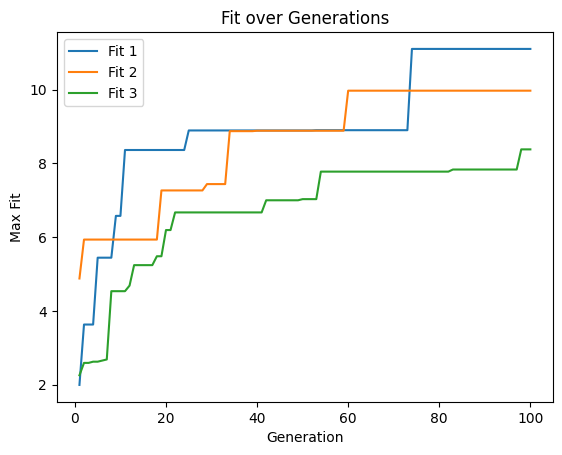

In [50]:
# read csv data
pltd = pd.read_csv(f"{path}default_settings.csv")
pltd2 = pd.read_csv(f"{path}default_settings2.csv") # extra data line
pltd3 = pd.read_csv(f"{path}default_settings3.csv")

# plot data
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='Fit 1')
sns.lineplot(pltd2, x=pltd2['Generation'], y=pltd2['Max Fit'], label='Fit 2')
sns.lineplot(pltd3, x=pltd3['Generation'], y=pltd3['Max Fit'], label='Fit 3')
plt.title('Fit over Generations')
plt.show()
# display(pltd)

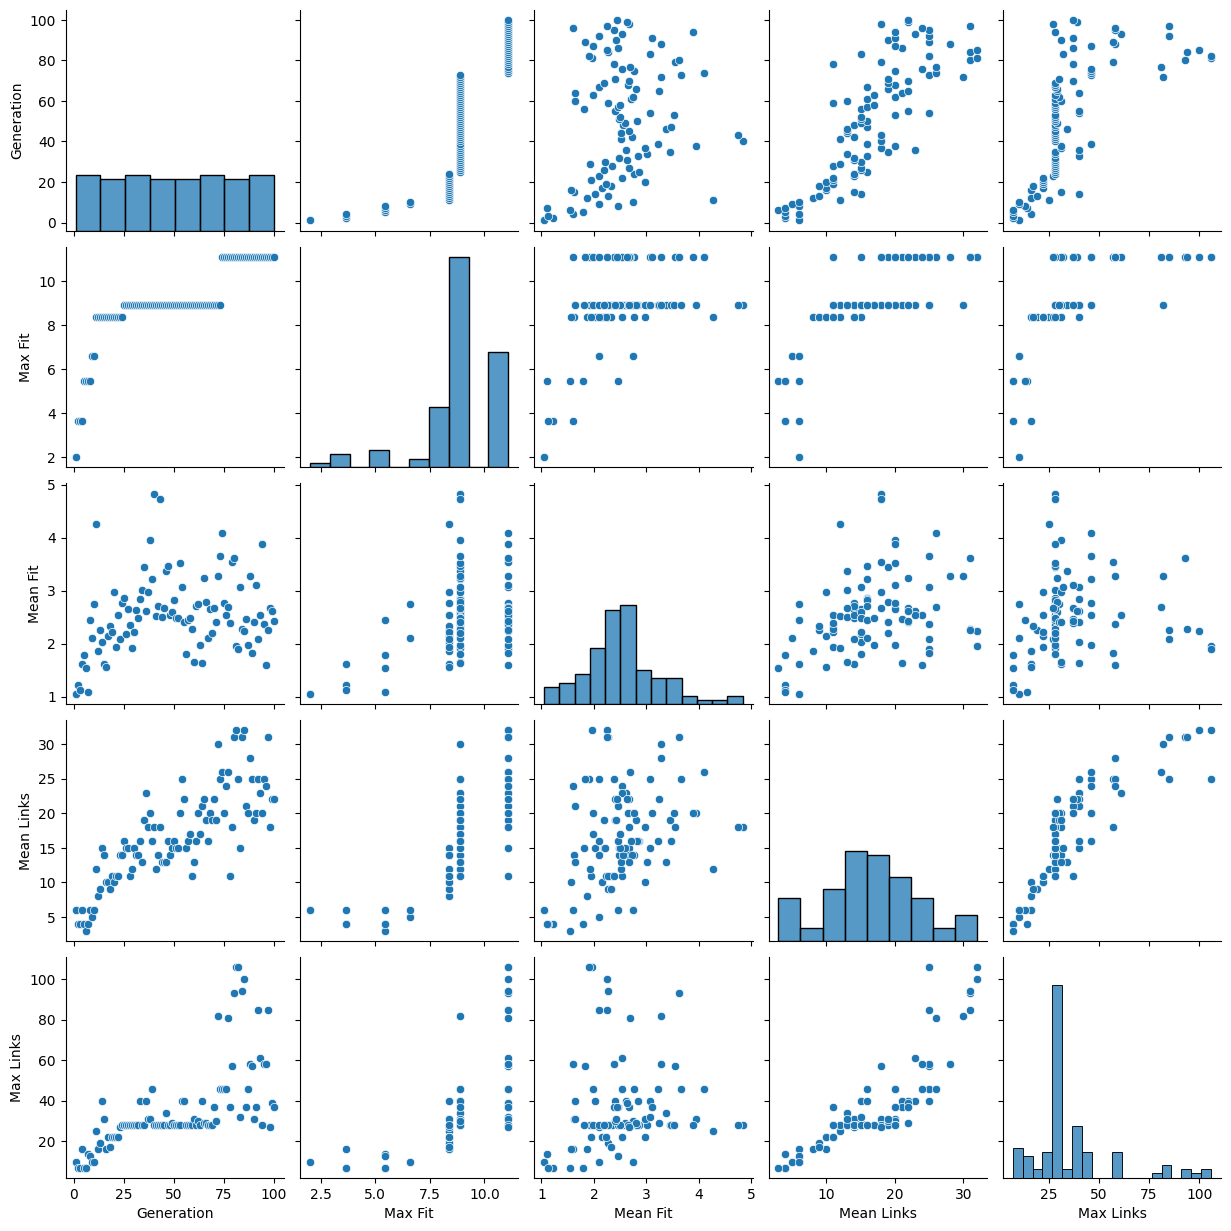

In [26]:
# plot pairplot of basic features to observe relations
pltd = pd.read_csv(f"{path}default_settings.csv")

sns.pairplot(pltd, diag_kind="hist")


In [42]:
# get data mean fit over 10-gen cycles
mean_test = []
for i in range(1,51):
    data = runGA(generations=10,pop_size=10,gene_count=3)
    mean_test.append([i, data[-1][1], data[-1][2]])

mean_test = pd.DataFrame(mean_test)
mean_test.columns=['Cycle', 'Mean Fit', 'Max Fit']
mean_test.to_csv(f'{path}default_mean_test2.csv', index=False)

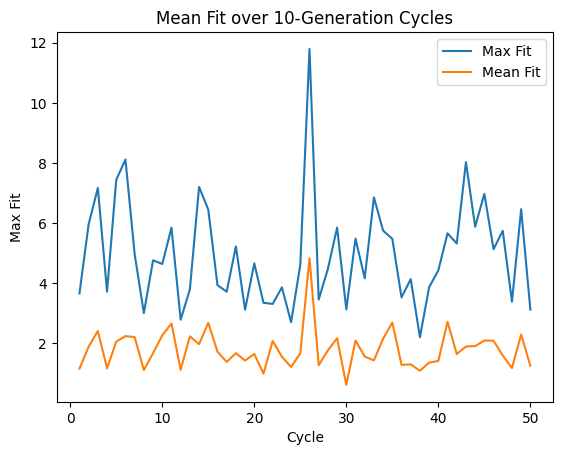

In [22]:
# read csv data
pltd = pd.read_csv(f"{path}default_mean_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Cycle'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Cycle'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Mean Fit over 10-Generation Cycles')
plt.show()


In [48]:
# get data from population increase over 10-gen cycles
pop_test = []
for i in range(5,51):
    data = runGA(generations=10,pop_size=i,gene_count=3)
    pop_test.append([i, data[-1][1], data[-1][2]])

pop_test = pd.DataFrame(pop_test)
pop_test.columns=['Population', 'Mean Fit', 'Max Fit']
pop_test.to_csv(f'{path}population_test2.csv', index=False)

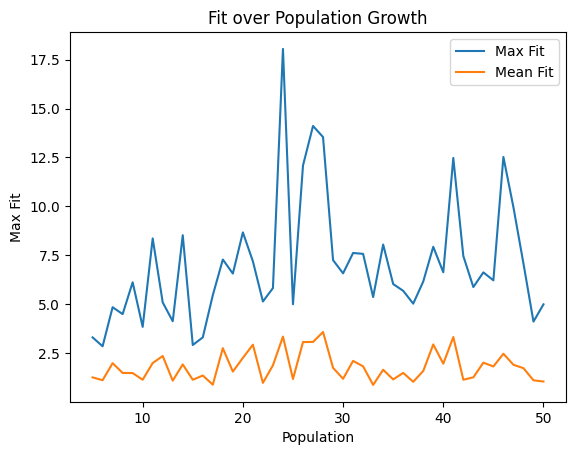

In [16]:
# read csv data
pltd = pd.read_csv(f"{path}population_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Population'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Population'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fit over Population Growth')
plt.show()

In [6]:
# test gene increase over 10-gen cycles
# note: took very long time when gene_count>10
gene_test = []
for i in range(1,11):
    data = runGA(generations=10,pop_size=10,gene_count=i)
    gene_test.append([i, data[-1][1], data[-1][2]])


gene_test = pd.DataFrame(gene_test)
gene_test.columns=['Gene Count', 'Mean Fit', 'Max Fit']
gene_test.to_csv(f'{path}gene_test2.csv', index=False)

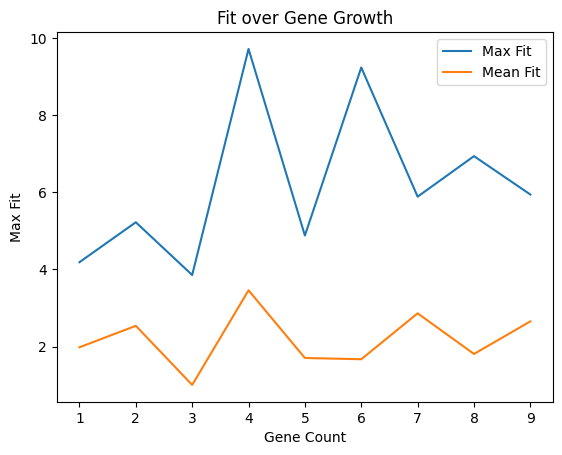

,Gene Count,Mean Fit,Max Fit
0,1,1.982,4.189
1,2,2.539,5.225
2,3,1.006,3.857
3,4,3.460,9.721
4,5,1.705,4.881
5,6,1.672,9.240
6,7,2.863,5.889
7,8,1.809,6.940
8,9,2.654,5.944


In [19]:
# read csv data
pltd = pd.read_csv(f"{path}gene_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Gene Count'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Gene Count'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fit over Gene Growth')
plt.show()

## Observations I

From the graphs above, we can observe some information:
- the growth rate of the max fit over generations is logarithmic, stagnating around 8-12 fitness
- the mean fit has no substantial growth, likely due to the population sampling technique being random
- a good benchmark for testing parameters is ~100 generations 
    - (however due to hardware limitations, generational computation is lower)
- mean/max links has weak correlation with mean/max fit

Using a rough set of optimal parameters, let's explore the mutation rate:
- point mutate
- shrink mutate
- grow mutate

In [27]:
# get data from population increase over 10-gen cycles
prate_test = []
for i in range(0,33):
    j = i * 0.02
    data = runGA(generations=10,pop_size=10,gene_count=3,
                 mut_prate=j, mut_srate=0.1,mut_grate=0.1)
    prate_test.append([np.round(j, 2), data[-1][1], data[-1][2]])


prate_test = pd.DataFrame(prate_test)
prate_test.columns=['Point Mutate Rate', 'Mean Fit', 'Max Fit']
prate_test.to_csv(f'{path}prate_test2.csv', index=False)

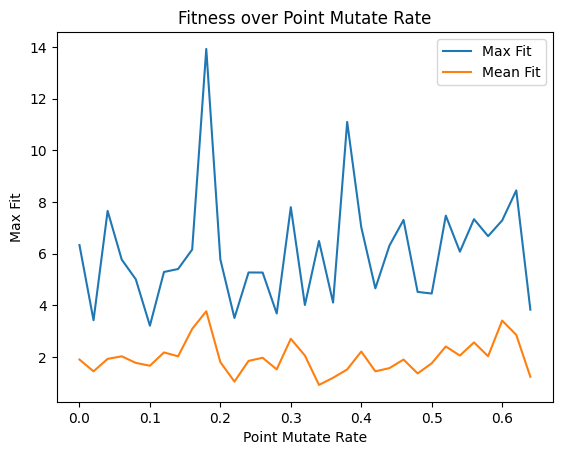

In [28]:
# read csv data
pltd = pd.read_csv(f"{path}prate_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Point Mutate Rate'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Point Mutate Rate'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness over Point Mutate Rate')
plt.show()

In [29]:
# get data from population increase over 10-gen cycles
srate_test = []
for i in range(0,33):
    j = i * 0.02
    data = runGA(generations=10,pop_size=10,gene_count=3, 
                 mut_prate=0.1, mut_srate=j,mut_grate=0.1)
    srate_test.append([np.round(j, 2), data[-1][1], data[-1][2]])


srate_test = pd.DataFrame(srate_test)
srate_test.columns=['Shrink Mutate Rate', 'Mean Fit', 'Max Fit']
srate_test.to_csv(f'{path}srate_test2.csv', index=False)

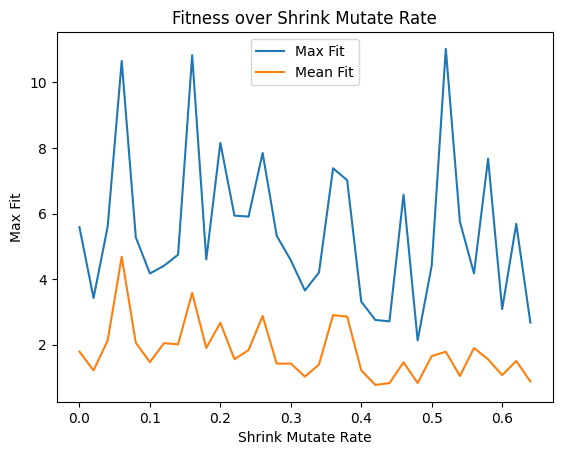

In [30]:
# read csv data
pltd = pd.read_csv(f"{path}srate_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Shrink Mutate Rate'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Shrink Mutate Rate'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness over Shrink Mutate Rate')
plt.show()

In [34]:
# get data from population increase over 10-gen cycles
grate_test = []
for i in range(0,33):
    j = i * 0.02
    data = runGA(generations=10,pop_size=10,gene_count=3,
                mut_prate=0.1, mut_srate=0.1,mut_grate=j)
    grate_test.append([np.round(j, 2), data[-1][1], data[-1][2]])



grate_test = pd.DataFrame(grate_test)
grate_test.columns=['Grow Mutate Rate', 'Mean Fit', 'Max Fit']
grate_test.to_csv(f'{path}grate_test.csv', index=False)

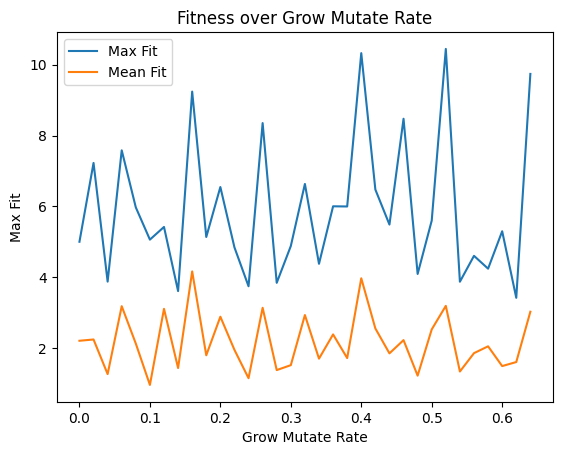

In [35]:
# read csv data
pltd = pd.read_csv(f"{path}grate_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Grow Mutate Rate'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Grow Mutate Rate'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness over Grow Mutate Rate')
plt.show()

## Observations II

From the graphs above, we can observe the following:
- there appears to be no significant change by increasing the rate
- the randomness at which new population is sampled from the genome shows up as random spikes
    - this ultimately boils down to `np.random()` returning a range 0-1
- overall averaging around 6-8 fitness, which corresponds to the generational fitness sampled at the beginning of this notebook

Note: as a fallacy, perhaps this approach is flawed and requires a different comparison or just larger set of data

# Encoding Scheme

For this next section we will use a similar testing method varying the encoding parameters instead. One variable that immediately stood out from the simulations is the distance between links may be too close. We will begin by increasing the joint-origin-xyz. ie. `dist=1.2` essentially means multiplying the joint distances.

In [39]:
# get test joint multi=1.2 with generation=100
dist_12 = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3, dist=1.2))
dist_12.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
dist_12.to_csv(f'{path}dist_12_test2.csv', index=False)
dist_12

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,1.004,1.889,6.0,10
1,2,1.189,1.889,6.0,10
2,3,1.109,1.998,5.0,10
3,4,0.928,1.998,4.0,10
4,5,0.813,1.998,5.0,12
...,...,...,...,...,...
95,96,3.494,13.277,12.0,22
96,97,2.205,13.277,18.0,40
97,98,5.295,13.277,12.0,22
98,99,4.178,13.277,12.0,22


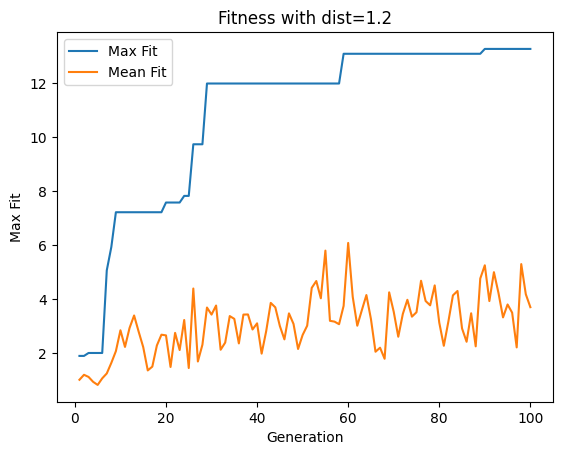

In [40]:
# read csv data
pltd = pd.read_csv(f"{path}dist_12_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness with dist=1.2')
plt.show()

In [41]:
# get test joint multi=1.4 with generation=100
dist_14 = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3, dist=1.4))
dist_14.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
dist_14.to_csv(f'{path}dist_14_test2.csv', index=False)
dist_14

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,0.918,2.236,6.0,13
1,2,1.192,2.236,5.0,13
2,3,1.366,2.520,6.0,13
3,4,1.406,2.871,6.0,14
4,5,1.381,2.871,6.0,22
...,...,...,...,...,...
95,96,5.215,18.844,9.0,13
96,97,4.372,18.844,9.0,16
97,98,5.877,18.844,10.0,19
98,99,4.328,18.844,8.0,12


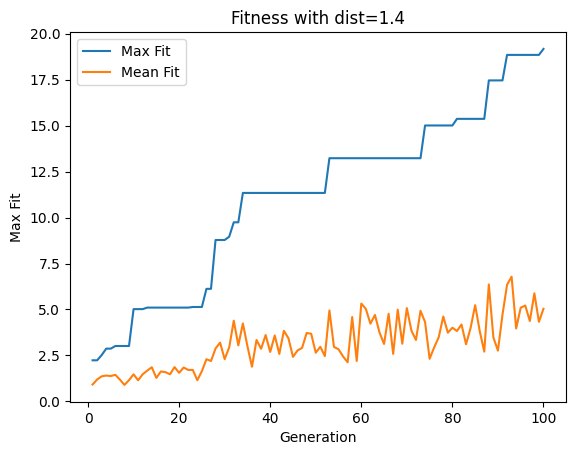

In [42]:
# read csv data
pltd = pd.read_csv(f"{path}dist_14_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness with dist=1.4')
plt.show()

In [43]:
# get test joint multi=1.6 with generation=100
dist_16 = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3, dist=1.6))
dist_16.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
dist_16.to_csv(f'{path}dist_16_test2.csv', index=False)
dist_16

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,1.298,5.103,7.0,13
1,2,1.645,5.103,6.0,12
2,3,1.489,5.103,5.0,7
3,4,2.378,5.103,5.0,10
4,5,2.205,5.103,5.0,10
...,...,...,...,...,...
95,96,2.450,12.896,10.0,13
96,97,2.746,12.896,11.0,25
97,98,2.302,12.896,12.0,31
98,99,4.130,12.896,14.0,31


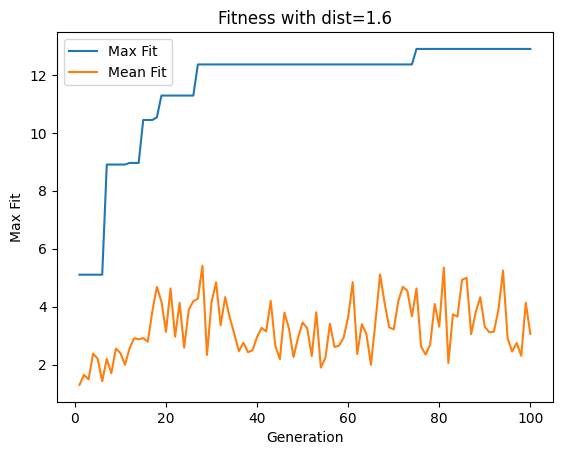

In [46]:
# read csv data
pltd = pd.read_csv(f"{path}dist_16_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness with dist=1.6')
plt.show()

In [47]:
# get test joint multi=1.8 with generation=100
dist_18 = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3, dist=1.8))
dist_18.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
dist_18.to_csv(f'{path}dist_18_test2.csv', index=False)
dist_18

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,0.984,2.531,6.0,10
1,2,0.794,2.531,5.0,9
2,3,1.237,3.244,5.0,7
3,4,1.483,3.508,4.0,6
4,5,0.998,3.508,3.0,5
...,...,...,...,...,...
95,96,1.341,5.545,3.0,5
96,97,1.730,5.545,4.0,9
97,98,1.772,5.545,5.0,8
98,99,1.680,5.545,5.0,7


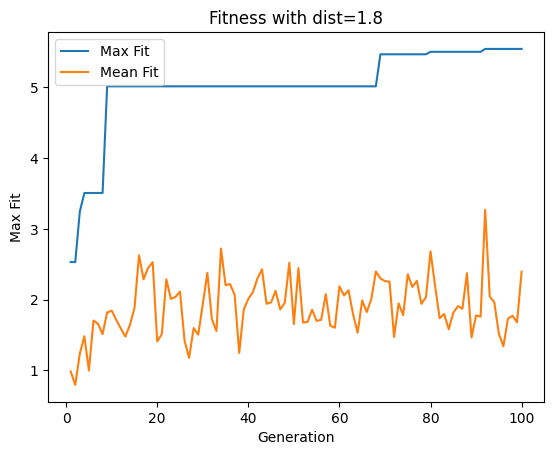

In [49]:
# read csv data
pltd = pd.read_csv(f"{path}dist_18_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness with dist=1.8')
plt.show()

In [53]:
# get test joint multi=2 with generation=100
dist_20 = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3, dist=2))
dist_20.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
dist_20.to_csv(f'{path}dist_20_test2.csv', index=False)
dist_20

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,0.969,2.130,7.0,13
1,2,1.444,2.770,7.0,13
2,3,1.038,2.770,5.0,13
3,4,0.966,2.770,5.0,13
4,5,0.848,2.770,4.0,13
...,...,...,...,...,...
95,96,2.753,6.493,4.0,7
96,97,2.316,6.493,4.0,4
97,98,1.605,6.493,3.0,6
98,99,1.924,6.493,3.0,6


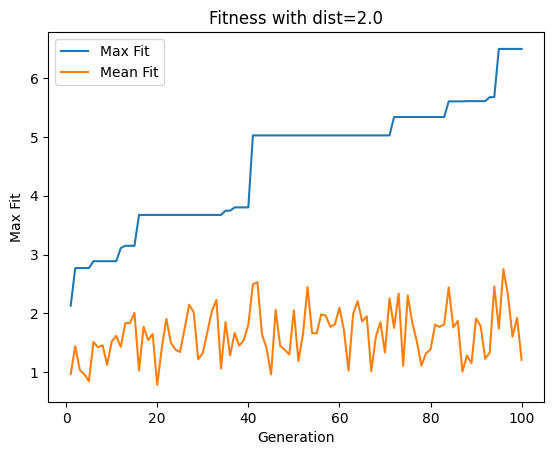

In [54]:
# read csv data
pltd = pd.read_csv(f"{path}dist_20_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness with dist=2.0')
plt.show()

In [55]:
# get test joint multi=3 with generation=100
dist_30 = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3, dist=3))
dist_30.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
dist_30.to_csv(f'{path}dist_30_test2.csv', index=False)
dist_30

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,0.775,2.288,5.0,7
1,2,1.338,2.530,5.0,7
2,3,1.418,3.192,5.0,7
3,4,1.305,3.192,6.0,13
4,5,1.664,4.863,7.0,13
...,...,...,...,...,...
95,96,1.181,5.290,5.0,13
96,97,1.114,5.290,5.0,9
97,98,1.232,5.290,6.0,9
98,99,1.324,5.290,7.0,13


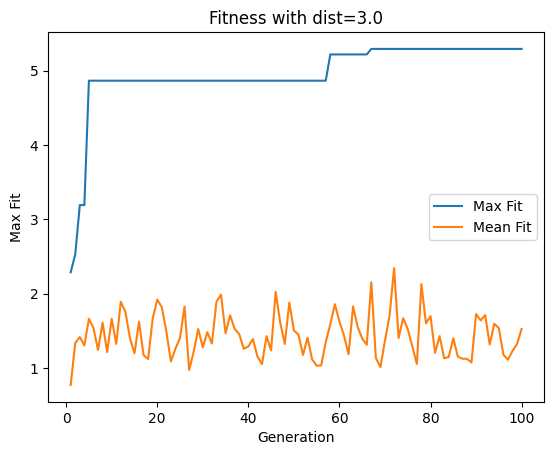

In [56]:
# read csv data
pltd = pd.read_csv(f"{path}dist_30_test.csv")

# plot data
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='Max Fit')
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Mean Fit'], label='Mean Fit')
plt.title('Fitness with dist=3.0')
plt.show()

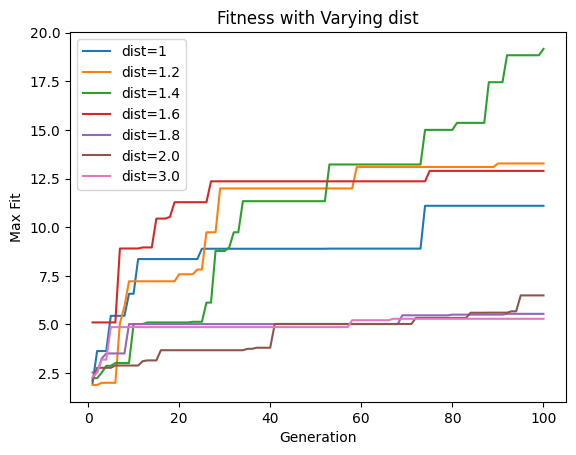

In [65]:
# read csv data
pltd1 = pd.read_csv(f"{path}default_settings.csv")
pltd2 = pd.read_csv(f"{path}dist_12_test.csv")
pltd3 = pd.read_csv(f"{path}dist_14_test.csv")
pltd4 = pd.read_csv(f"{path}dist_16_test.csv")
pltd5 = pd.read_csv(f"{path}dist_18_test.csv")
pltd6 = pd.read_csv(f"{path}dist_20_test.csv")
pltd7 = pd.read_csv(f"{path}dist_30_test.csv")

# plot data
sns.lineplot(pltd1, x=pltd1['Generation'], y=pltd1['Max Fit'], label='dist=1')
sns.lineplot(pltd2, x=pltd2['Generation'], y=pltd2['Max Fit'], label='dist=1.2')
sns.lineplot(pltd3, x=pltd3['Generation'], y=pltd3['Max Fit'], label='dist=1.4')
sns.lineplot(pltd4, x=pltd4['Generation'], y=pltd4['Max Fit'], label='dist=1.6')
sns.lineplot(pltd5, x=pltd5['Generation'], y=pltd5['Max Fit'], label='dist=1.8')
sns.lineplot(pltd6, x=pltd6['Generation'], y=pltd6['Max Fit'], label='dist=2.0')
sns.lineplot(pltd7, x=pltd7['Generation'], y=pltd7['Max Fit'], label='dist=3.0')
plt.title('Fitness with Varying dist')
plt.show()

Do the same thing with rpy, at increments of 1

In [62]:
# get test rpy multi with generation=100
rpy_5 = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3))
rpy_5.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
rpy_5.to_csv(f'{path}rpy_5_test.csv', index=False)
rpy_5

,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,1.487,5.551,6.0,9
1,2,1.747,5.551,5.0,9
2,3,1.444,5.551,5.0,9
3,4,1.355,5.551,5.0,16
4,5,1.244,5.551,5.0,15
...,...,...,...,...,...
95,96,1.778,6.665,9.0,11
96,97,1.687,6.665,8.0,11
97,98,1.974,6.665,12.0,27
98,99,1.836,6.665,11.0,27


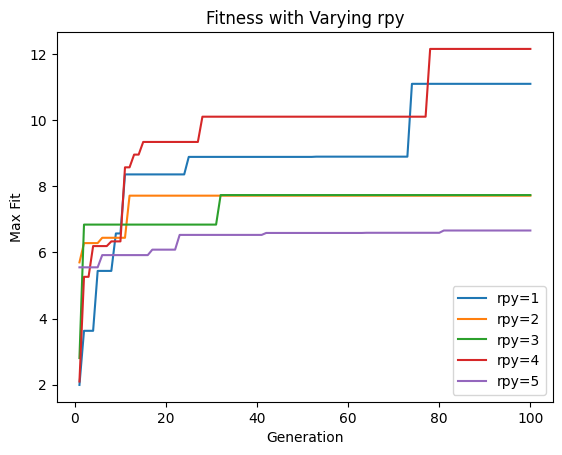

In [66]:
pltd = pd.read_csv(f"{path}default_settings.csv")
sns.lineplot(pltd, x=pltd['Generation'], y=pltd['Max Fit'], label='rpy=1')

for i in range(1,5):
    pltd_rpy = pd.read_csv(f"{path}rpy_{i+1}_test.csv")
    sns.lineplot(pltd_rpy, x=pltd_rpy['Generation'], y=pltd_rpy['Max Fit'], label=f'rpy={i+1}')

plt.title('Fitness with Varying rpy')
plt.show()

## Observations III

Overall, increasing distance between joints has increased the maximum fitness achieved by 100 generations. This is as expected, because we are increasing the area the biomorph covers- and could abstractly be thought of as longer strides.

Increasing `rpy` can also be thought of as increasing rotation speed of joints, and under the right conditions could be direct increases to distance travelled over a period of time. Although this was not reflected in the results.

## Results

In this section, we plot the fitness data of the biomorphs with optimized weights.

In [71]:
# optimize xyz/rpy multi with generation=100
optimize = pd.DataFrame(runGA(generations=100,pop_size=10,gene_count=3))
optimize.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
optimize.to_csv(f'{path}optimize100_test2.csv', index=False)
optimize

Saved to elite_99.csv


,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,1.075,2.620,6.0,13
1,2,1.118,2.620,6.0,13
2,3,1.702,3.618,7.0,13
3,4,1.486,3.618,6.0,7
4,5,1.359,3.618,5.0,7
...,...,...,...,...,...
95,96,2.288,7.671,18.0,40
96,97,1.961,7.671,21.0,40
97,98,2.911,7.671,24.0,40
98,99,2.537,7.671,14.0,27


In [69]:
# optimize xyz/rpy multi with generation=200
optimize = pd.DataFrame(runGA(generations=200,pop_size=10,gene_count=3))
optimize.columns=['Generation','Mean Fit','Max Fit','Mean Links','Max Links']
optimize.to_csv(f'{path}optimize200_test2.csv', index=False)
optimize

Saved to elite_199.csv


,Generation,Mean Fit,Max Fit,Mean Links,Max Links
0,1,1.317,3.476,6.0,9
1,2,1.689,4.441,5.0,7
2,3,1.286,4.441,5.0,11
3,4,1.068,4.441,5.0,10
4,5,1.543,5.816,3.0,7
...,...,...,...,...,...
195,196,2.297,12.299,10.0,22
196,197,3.926,12.299,11.0,22
197,198,2.803,12.299,10.0,15
198,199,3.361,12.299,9.0,15


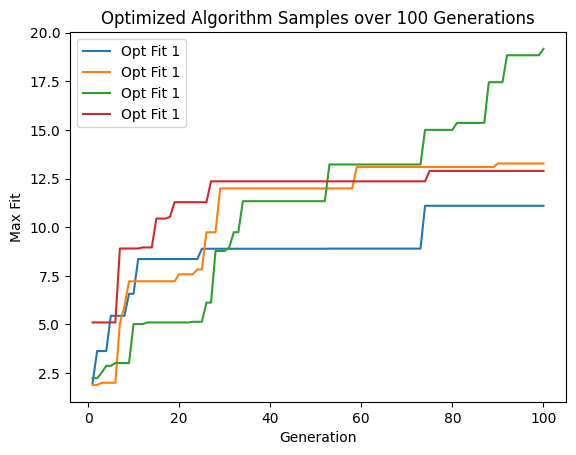

In [74]:
# read csv data
plt1 = pd.read_csv(f"{path}elite_99.csv")
plt2 = pd.read_csv(f"{path}elite_100.csv")
plt3 = pd.read_csv(f"{path}optimize100_test.csv")
plt4 = pd.read_csv(f"{path}optimize100_test2.csv")

sns.lineplot(pltd1, x=pltd1['Generation'], y=pltd1['Max Fit'], label='Opt Fit 1')
sns.lineplot(pltd2, x=pltd2['Generation'], y=pltd2['Max Fit'], label='Opt Fit 2')
sns.lineplot(pltd3, x=pltd3['Generation'], y=pltd3['Max Fit'], label='Opt Fit 3')
sns.lineplot(pltd4, x=pltd4['Generation'], y=pltd4['Max Fit'], label='Opt Fit 4')
plt.title('Optimized Algorithm Samples over 100 Generations')
plt.show()

## Conclusion

In summary, we can conclude that by testing parameters to find optimal weights, we can more efficiently run the algorithm.While using a data analysis approach to determine parameters is possible, it is less efficient, driven by a trial and error method. 

There are some fallacies in my overall approach I will point out here:
- results are still highly volatile, and results are time consuming to compute 
- long term iteration calculation was not observed past 200 generations
- variance over time of fitness was not taken into consideration, eg. z-scores
- this notebook does not explore the possible relation of three or more variables in relation to each other
- when running the sim, the best biomorphs seem to be ones that collide into each other to create "bugged" momentum
- some variables that have not been considered is difficult to propagate down in the code to analyze without a rewrite